# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [62]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [63]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY2")

In [64]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [65]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_articles = bitcoin_news["articles"]

In [66]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_articles = ethereum_news["articles"]
ethereum_articles

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Adi Robertson',
  'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
  'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
  'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
  'publishedAt': '2021-03-15T22:25:02Z',
  'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys l

In [67]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_corpus=[]
counter=0
for article in bitcoin_articles:
    bitcoin_corpus.append(bitcoin_articles[counter]["content"])
    counter+=1

bitcoin_corpus_df = pd.DataFrame({
    "text": bitcoin_corpus
})


# Create dictionary to hold sentiment scores
bitcoin_sentiment = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}

# Perform sentiment analysis on Bitcoin articles
for row in bitcoin_corpus_df.iterrows():
    bitcoin_analysis = analyzer.polarity_scores(row[1]["text"])
    bitcoin_sentiment["Compound"].append(bitcoin_analysis["compound"])
    bitcoin_sentiment["Negative"].append(bitcoin_analysis["neg"])
    bitcoin_sentiment["Neutral"].append(bitcoin_analysis["neu"])
    bitcoin_sentiment["Positive"].append(bitcoin_analysis["pos"])

# Joining sentiment analysis 
bitcoin_analysis_df = pd.DataFrame.from_dict(bitcoin_sentiment)
bitcoin_df = pd.concat([bitcoin_analysis_df, bitcoin_corpus_df], axis=1)  


,Compound,Negative,Neutral,Positive,text
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...


In [161]:
btc_dict = {}
for counter, article in enumerate(bitcoin_articles):
    btc_dict[counter]={}

    bitcoin_analysis = analyzer.polarity_scores(article['content'])
    btc_dict[counter]['text']= article["content"]
    btc_dict[counter]['Compound'] = bitcoin_analysis["compound"]
    btc_dict[counter]['Negative'] = bitcoin_analysis["neg"]
    btc_dict[counter]['Positive'] = bitcoin_analysis["pos"]
    btc_dict[counter]['Neutral'] = bitcoin_analysis["neu"]

bitcoin_analysis2_df = pd.DataFrame.from_dict(btc_dict,orient='index')
bitcoin_analysis2_df.head()

,text,Compound,Negative,Positive,Neutral
0,Whether youre looking to make a larger investm...,0.0772,0.0,0.039,0.961
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.0,0.127,0.873
2,The crypto industry as a whole has seen a mome...,0.6124,0.0,0.135,0.865
3,The inevitable has happened: You can now purch...,0.3182,0.0,0.065,0.935
4,Tesla made headlines earlier this year when it...,0.2023,0.0,0.050,0.950


In [162]:
# Create the ethereum sentiment scores DataFrame
ethereum_corpus=[]
counter=0
for article in ethereum_articles:
    ethereum_corpus.append(ethereum_articles[counter]["content"])
    counter+=1

ethereum_corpus_df = pd.DataFrame({
    "text" : ethereum_corpus
})

# Create dictionary to hold sentiment scores
ethereum_sentiment = {
    "Compound": [],
    "Negative": [],
    "Neutral": [],
    "Positive": []
}

# Perform sentiment analysis on Ethereum articles
for row in ethereum_corpus_df.iterrows():
    ethereum_analysis = analyzer.polarity_scores(row[1]["text"])
    ethereum_sentiment["Compound"].append(ethereum_analysis["compound"])
    ethereum_sentiment["Negative"].append(ethereum_analysis["neg"])
    ethereum_sentiment["Neutral"].append(ethereum_analysis["neu"])
    ethereum_sentiment["Positive"].append(ethereum_analysis["pos"])

ethereum_analysis_df = pd.DataFrame(ethereum_sentiment)
ethereum_df = pd.concat([ethereum_analysis_df,ethereum_corpus_df], axis=1)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5574,0.11,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.00,0.961,0.039,Whether youre looking to make a larger investm...
2,0.0000,0.00,1.000,0.000,Famed auction house Christies just sold its fi...
3,0.0000,0.00,1.000,0.000,Payment card network Visa has announced that t...
4,0.2732,0.00,0.938,0.062,"ConsenSys, a key player in crypto and a major ..."


In [69]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.217520,0.028250,0.895500,0.076250
std,0.375003,0.047327,0.082559,0.068848
min,-0.557400,0.000000,0.709000,0.000000
25%,0.000000,0.000000,0.863250,0.029250
50%,0.307100,0.000000,0.918500,0.065500
75%,0.417375,0.054500,0.940250,0.103750
max,0.771700,0.142000,1.000000,0.240000


In [70]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.023990,0.033500,0.93000,0.036550
std,0.294225,0.041179,0.07114,0.049016
min,-0.557400,0.000000,0.73500,0.000000
25%,-0.115300,0.000000,0.91475,0.000000
50%,0.000000,0.000000,0.93700,0.000000
75%,0.126200,0.071000,1.00000,0.065000
max,0.565000,0.110000,1.00000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [71]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [72]:
# Expand the default stopwords list if necessary
sw_addon = {'youre', 'whether', 'said', 'also', 'like', 'seen', 'chars', 'arent', 'according', 'first', 'one', 'make', 'allowed', 'got', 'made'}

In [81]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    # Remove punctuation
    text_clean = [regex.sub('', text)]
    # Tokenize words
    word_tokenized = [word_tokenize(i) for i in text_clean]
    # Convert the words to lowercase and remove stop words
    lower_tokenized = [word.lower() for words in word_tokenized for word in words if word.lower() not in sw.union(sw_addon)]
    print(lower_tokenized)
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_tokenized]
    return tokens

In [143]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(article) for article in bitcoin_corpus]
bitcoin_df["tokens"] = bitcoin_tokens

['looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab']
['promised', 'earlier', 'year', 'tesla', 'accepts', 'payment', 'bitcoin', 'teslas', 'website', 'tweet', 'ceo', 'elon', 'musk', 'subsequent', 'tweet', 'musk', 'bitcoin', 'paid', 'tesla']
['crypto', 'industry', 'whole', 'momentous', 'year', 'growth', 'heavily', 'spurred', 'entrance', 'institutional', 'investors', 'adopting', 'bitcoin', 'due', 'store', 'value', 'properties', 'spike']
['inevitable', 'happened', 'purchase', 'tesla', 'vehicle', 'bitcointhis', 'tesla', 'ceo', 'pardon', 'technoking', 'elon', 'musk', 'tweeted', 'wednesdayyou', 'buy', 'tesla']
['tesla', 'headlines', 'earlier', 'year', 'took', 'significant', 'holdings', 'bitcoin', 'acquiring', 'roughly', 'billion', 'stake', 'thenprices', 'early', 'february', 'time', 'noted', 'sec']
['national', 'burrito', 'day', 'lands', 'april', 'fools', 'day', 'year', 'thank

In [122]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(article) for article in ethereum_corpus]
ethereum_df["tokens"] = ethereum_tokens

['strictest', 'crackdowns', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'reuters', 'countrys', 'legislat']
['looking', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'youll', 'ab']
['famed', 'auction', 'house', 'christies', 'sold', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'digital', 'file', 'collage', 'images', 'complex', 'legac']
['payment', 'card', 'network', 'visa', 'announced', 'transactions', 'settled', 'using', 'usd', 'coin', 'usdc', 'stablecoin', 'powered', 'ethereum', 'blockchain', 'cryptocom', 'company', 'test', 'new', 'capabi']
['consensys', 'key', 'player', 'crypto', 'major', 'proponent', 'ethereum', 'blockchain', 'raised', 'million', 'funding', 'round', 'fromjp', 'morgan', 'mastercard', 'ubs', 'ag', 'well', 'major', 'blockchain', 'compan']
['move', 'fast', 'b

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [123]:
from collections import Counter
from nltk import ngrams

In [124]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for word in bitcoin_tokens:
    bitcoin_words.extend(word)
bitcoin_ngrams = Counter(ngrams(bitcoin_words, n=2))
dict(bitcoin_ngrams.most_common(20))
bitcoin_words

{('earlier', 'year'): 2,
 ('elon', 'musk'): 2,
 ('nonfungible', 'token'): 2,
 ('microstrategy', 'inc'): 2,
 ('inc', 'major'): 2,
 ('major', 'bitcoin'): 2,
 ('bitcoin', 'corporate'): 2,
 ('corporate', 'backer'): 2,
 ('backer', 'monday'): 2,
 ('monday', 'nonemployee'): 2,
 ('nonemployee', 'director'): 2,
 ('director', 'get'): 2,
 ('get', 'fee'): 2,
 ('fee', 'service'): 2,
 ('service', 'bitcoin'): 2,
 ('bitcoin', 'instead'): 2,
 ('reuters', 'stafffile'): 2,
 ('stafffile', 'photo'): 2,
 ('photo', 'representation'): 2,
 ('representation', 'virtual'): 2}

In [125]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for word in ethereum_tokens:
    ethereum_words.extend(word)
ethereum_ngrams = Counter(ngrams(ethereum_words, n=2))
dict(ethereum_ngrams)

{('strictest', 'crackdown'): 1,
 ('crackdown', 'worldwidephoto'): 1,
 ('worldwidephoto', 'michele'): 1,
 ('michele', 'doying'): 1,
 ('doying', 'vergeindia'): 1,
 ('vergeindia', 'reportedly'): 1,
 ('reportedly', 'moving'): 1,
 ('moving', 'forward'): 1,
 ('forward', 'sweeping'): 1,
 ('sweeping', 'ban'): 1,
 ('ban', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'reuters'): 1,
 ('reuters', 'country'): 1,
 ('country', 'legislat'): 1,
 ('legislat', 'looking'): 1,
 ('looking', 'larger'): 1,
 ('larger', 'investment'): 1,
 ('investment', 'want'): 1,
 ('want', 'dabble'): 1,
 ('dabble', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'purchase'): 1,
 ('purchase', 'bitcoin'): 1,
 ('bitcoin', 'ethereum'): 1,
 ('ethereum', 'bitcoin'): 1,
 ('bitcoin', 'cash'): 1,
 ('cash', 'litecoin'): 1,
 ('litecoin', 'paypal'): 1,
 ('paypal', 'soon'): 1,
 ('soon', 'youll'): 1,
 ('youll', 'ab'): 1,
 ('ab', 'famed'): 1,
 ('famed', 'auction'): 1,
 ('auction', 'house'): 1,
 ('house', 'christie'): 1,
 ('christie', 'sold')

In [126]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [127]:
# Get the top 10 words for Bitcoin
bitcoin_top_words = token_count(bitcoin_words, N=10)
bitcoin_top_words

[('bitcoin', 17),
 ('tesla', 7),
 ('reuters', 7),
 ('year', 6),
 ('crypto', 4),
 ('cryptocurrencies', 3),
 ('musk', 3),
 ('growth', 3),
 ('investment', 2),
 ('purchase', 2)]

In [128]:
# Get the top 10 words for Ethereum
ethereum_top_words = token_count(ethereum_words, N=10)
ethereum_top_words

[('ethereum', 5),
 ('new', 5),
 ('nft', 5),
 ('digital', 4),
 ('blockchain', 4),
 ('cryptocurrency', 4),
 ('cryptocurrencies', 3),
 ('country', 3),
 ('bitcoin', 3),
 ('million', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [129]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

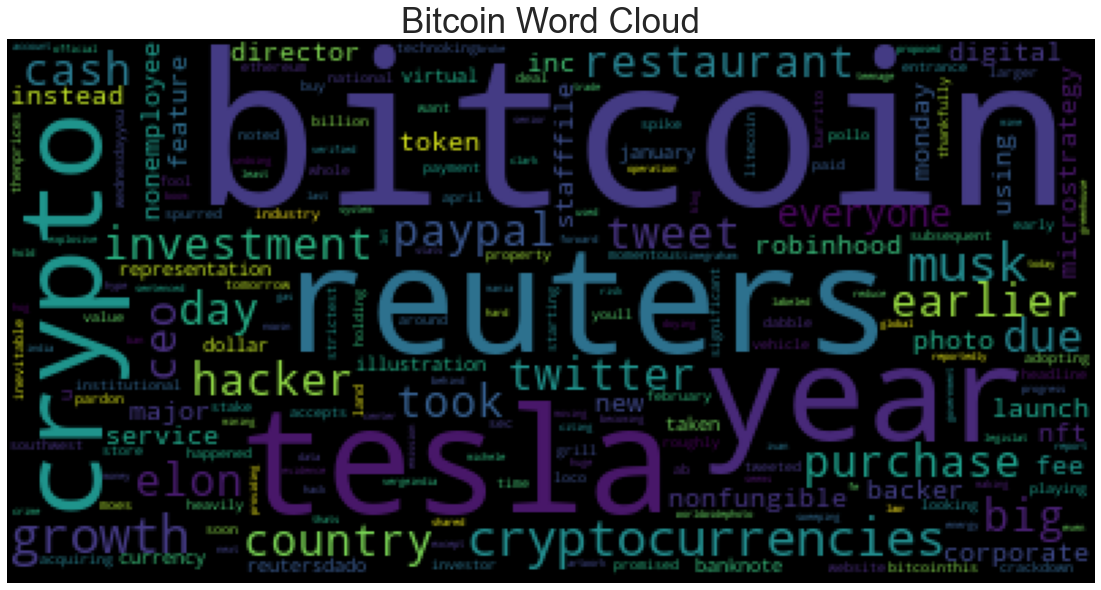

In [130]:
# Generate the Bitcoin word cloud
wc = WordCloud()
bitcoin_string = ' '.join(bitcoin_words)
bitcoin_wordcloud = wc.generate(bitcoin_string)
plt.imshow(bitcoin_wordcloud);
plt.title(label="Bitcoin Word Cloud", size=35)
plt.axis("off");

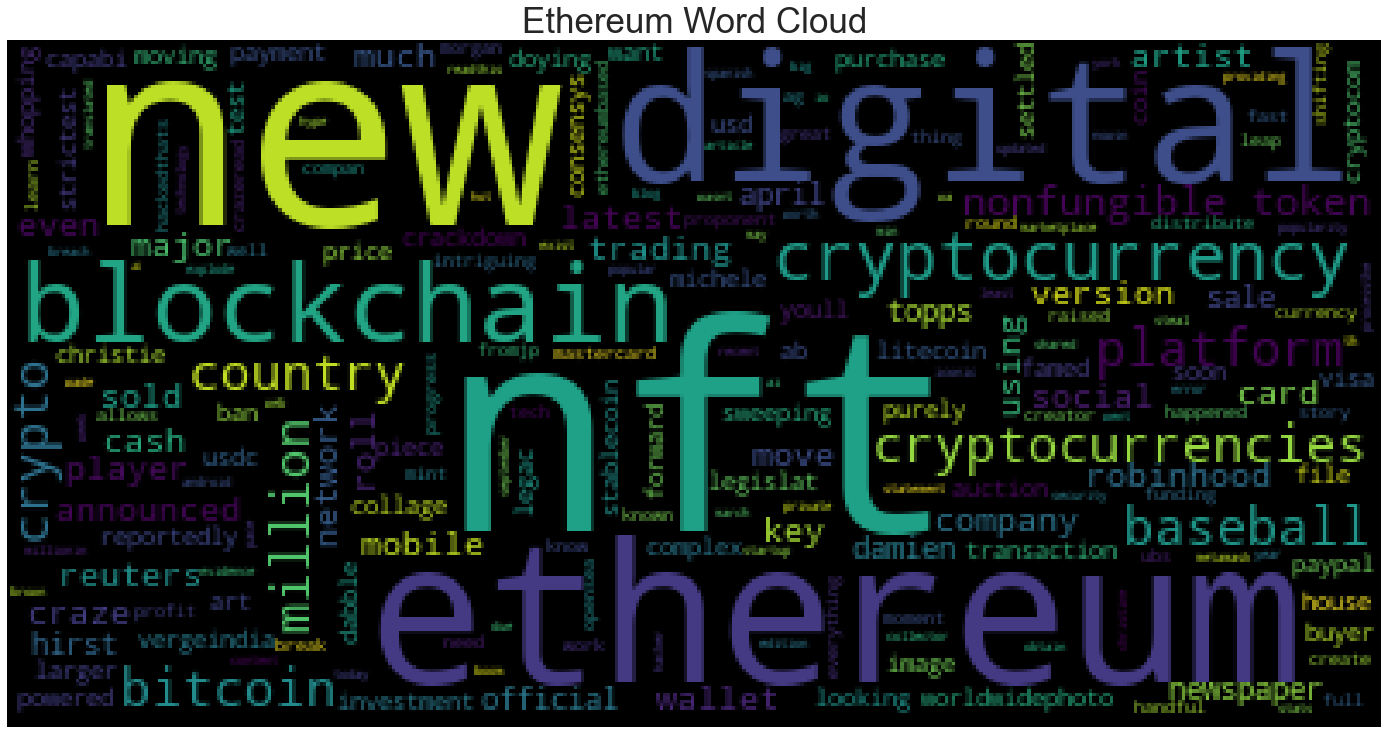

In [131]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_words)
ethereum_wordcloud = wc.generate(ethereum_string)
plt.imshow(ethereum_wordcloud);
plt.axis("off");
plt.title(label="Ethereum Word Cloud", size=35)
plt.tight_layout(pad=0);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [132]:
import spacy
from spacy import displacy

In [133]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 47.1 MB 6.5 MB/s eta 0:00:011
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [134]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [135]:
# Concatenate all of the bitcoin text together
bitcoin_text = ''.join(bitcoin_corpus)

In [136]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [137]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [138]:
# List all Entities
print(bitcoin_ner.user_data["title"])
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Bitcoin NER
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
a momentous year DATE
2020 DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Burrito Day PERSON
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
millions CARDINAL
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
the United States GPE
FD Funds Management LLC ORG
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 2

---

## Ethereum NER

In [139]:
# Concatenate all of the ethereum text together
ethereum_text = ''.join(ethereum_corpus)

In [140]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [141]:
# Render the visualization
displacy.render(ethereum_ner, style="ent")

In [142]:
# List all Entities
print(ethereum_ner.user_data["title"])
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

Ethereum NER
One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Ethereum ORG
NFT ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
chars]MetaMask PERSON
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
26, 2021 DATE
Spanish NORP
AI ORG
New York Times ORG
daily DATE
Topps GPE
first ORDINAL
NFT ORG
36.32 MONEY
April 3 DATE
90% PERCENT
as much as 8% PERCENT
Tuesday DATE
Coinbase ORG
Berlin GPE
April 14 DATE
hours TIME
Beeple’s ORG
$69 million MONEY
NFT ORG
24 CARDINAL
24 CARDINAL
MLB ORG
NFT ORG
Major League Baseball ORG
NFT ORG
Topps GPE
India GPE
Reuters ORG
Hirst PERSON
Chris Young PERSON
Superstar PERSON
Damien Hirst PERSON
